In [1]:
import numpy as np
from collections import Counter

In [4]:
class NaiveBayes:
    """
    Using Bayes throrem with naive feature independence assumption
    Calc probabilities for each class
    Makes predictions based on highest probability
    """
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)

        for i, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[i, :] = X_c.mean(axis=0)
            self._var[i, :] = X_c.var(axis=0)
            self._priors[i] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])
    
    def _predict_single(self, x):
        posteriors = []

        for i, c in enumerate(self._classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._pdf(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_i, x):
        # prob density function
        mean = self._mean[class_i]
        var = self._var[class_i]
        numerator = np.exp(-(x - mean) ** 2 / (2*var))
        denominator = np.sqrt(2*np.pi *var)
        
        return numerator / denominator

Naive Bayes Accuracy: 0.875


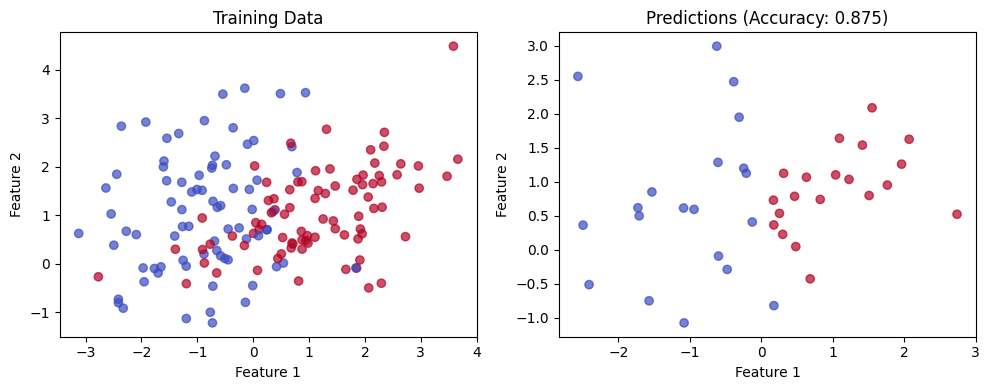


First 5 predictions vs actual:
Predicted: [0 1 1 1 1]
Actual:     [0 0 0 1 1]

Class Priors: [0.48125 0.51875]
Class Means:
[[-0.88842976  1.05004012]
 [ 1.12825961  1.04799938]]


In [5]:
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    
    # Create sample dataset
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                              n_informative=2, n_clusters_per_class=1, 
                              random_state=42)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train Naive Bayes
    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    
    # Make predictions
    predictions = nb.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Naive Bayes Accuracy: {accuracy:.3f}")
    
    # Simple visualization
    plt.figure(figsize=(10, 4))
    
    # Plot training data
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
    plt.title('Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Plot predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
    plt.title(f'Predictions (Accuracy: {accuracy:.3f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    # Show some probability calculations
    print(f"\nFirst 5 predictions vs actual:")
    print("Predicted:", predictions[:5])
    print("Actual:    ", y_test[:5])
    
    # Show class statistics
    print(f"\nClass Priors: {nb._priors}")
    print(f"Class Means:\n{nb._mean}")